In [109]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk
#from gensim.models import Word2Vec 
#from gensim.models.wrappers import FastText 

#from gensim.models import FastText



from IPython.display import clear_output, display

from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk 
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
import re
from sklearn.feature_extraction import text
from builtins import input
from statistics import mean
from nltk import  pos_tag_sents


from statistics import mode, StatisticsError

import functools


import re
from sklearn.feature_extraction import text
global cases

from pandas import ExcelWriter
import xlsxwriter

import xlwt
from xlwt.Workbook import *


from nltk.corpus import wordnet

from statistics import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import re
from nltk import pos_tag

In [9]:
df = pd.read_csv('Sentiment-Analysis-NYT-Articlesdir\\allNYTSearch1980to2020.txt', sep = "\t", encoding = 'iso-8859-1')

In [10]:
df.drop_duplicates(subset ="response.docs._id", 
                     keep = False, inplace = True) 

In [11]:
df

,status,copyright,response.docs.abstract,response.docs.web_url,response.docs.snippet,response.docs.lead_paragraph,response.docs.print_section,response.docs.print_page,response.docs.source,response.docs.pub_date,...,response.docs.headline.print_headline,response.docs.headline.name,response.docs.headline.seo,response.docs.headline.sub,response.docs.byline.original,response.docs.byline.organization,response.meta.hits,response.meta.offset,response.meta.time,response.docs.subsection_name
1,OK,Copyright (c) 2020 The New York Times Company....,Federal officials said today that the Govern...,https://www.nytimes.com/1981/01/03/us/us-may-a...,NaN,Federal officials said today that the Governme...,1,10,The New York Times,1981-01-03T05:00:00+0000,...,U.S. MAY APPEAL RULING FORBIDDING INDEFINITE D...,NaN,NaN,NaN,"By Robert Pear, Special To the New York Times",NaN,986,0.0,244.0,NaN
2,OK,Copyright (c) 2020 The New York Times Company....,By Michael Wright and Caroline Rand Herron U...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,By Michael Wright and Caroline Rand Herron Unt...,4,2,The New York Times,1981-01-04T05:00:00+0000,...,THE NATION; Demand for Action On Jailed Refugee,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
3,OK,Copyright (c) 2020 The New York Times Company....,With ''descents'' rising and ''ascents'' dec...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,With ''descents'' rising and ''ascents'' decli...,4,4,The New York Times,1981-01-04T05:00:00+0000,...,ISRAELI EMIGRATION INSPIRES ANGER AND FEAR,NaN,NaN,NaN,By Henry Kamm,NaN,986,0.0,244.0,NaN
4,OK,Copyright (c) 2020 The New York Times Company....,Bruce Feirstein is a writer living in New Yo...,https://www.nytimes.com/1981/01/04/magazine/th...,NaN,Bruce Feirstein is a writer living in New York...,6,26,The New York Times,1981-01-04T05:00:00+0000,...,THE OLD STARGAZER'S ALMANAC FOR 1981,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
5,OK,Copyright (c) 2020 The New York Times Company....,The General Accounting Office says there app...,https://www.nytimes.com/1981/01/04/us/bogus-so...,NaN,The General Accounting Office says there appea...,1,20,The New York Times,1981-01-04T05:00:00+0000,...,BOGUS SOCIAL SECURITY CARDS FOUND INCREASING B...,NaN,NaN,NaN,"By Robert Pear, Special To the New York Times",NaN,986,0.0,244.0,NaN
6,OK,Copyright (c) 2020 The New York Times Company....,By Michael Wright and Caroline Rand Herron T...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,By Michael Wright and Caroline Rand Herron The...,4,2,The New York Times,1981-01-04T05:00:00+0000,...,THE NATION; Back to the Old Teeming Shore,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
7,OK,Copyright (c) 2020 The New York Times Company....,"The financier Robert L. Vesco, who dropped o...",https://www.nytimes.com/1981/01/06/us/vesco-re...,NaN,"The financier Robert L. Vesco, who dropped out...",B,8,The New York Times,1981-01-06T05:00:00+0000,...,Vesco Returns to Nassau Home; VESCO RETURNS TO...,NaN,NaN,NaN,AP,AP,986,0.0,244.0,NaN
8,OK,Copyright (c) 2020 The New York Times Company....,After months of intense lobbying and interna...,https://www.nytimes.com/1981/01/07/us/identifi...,NaN,After months of intense lobbying and internal ...,B,5,The New York Times,1981-01-07T05:00:00+0000,...,IDENTIFICATION CARD IDEA SHELVED BY A U.S. PANEL,NaN,NaN,NaN,UPI,NaN,986,0.0,244.0,NaN
9,OK,Copyright (c) 2020 The New York Times Company....,A Federal immigration commission today retra...,https://www.nytimes.com/1981/01/08/us/around-t...,NaN,A Federal immigration commission today retract...,A,16,The New York Times,1981-01-08T05:00:00+0000,...,AROUND THE NATION; Immigration Panel Modifies ...,NaN,NaN,NaN,UPI,NaN,986,0.0,244.0,NaN
10,OK,Copyright (c) 2020 The New York Times Company....,Bahamian immigration officials who want to d...,https://www.nytimes.com/1981/01/08/us/bahamian...,NaN,Bahamian immigration officials who want to dep...,B,17,The New York Times,1981-01-08T05:00:00+0000,...,Bahamian Officials Order Vesco To Leave the Co...,NaN,N

In [ ]:
#TODO:

What performs better? semi standarization or Full standarization?



In [18]:
def preprocess_regex(row):
    row=str(row)
    #row = row.lower()
    row=row.replace('-'," ") 
    #row=row.replace(','," ")
    #row=row.replace('.'," ")
    row=row.replace('+'," ")
    row=row.replace('"'," ")
    row=row.replace("''","")
    row=row.replace("'","")
    row=row.replace(":","")
    row=row.replace("_","")
    row = row.replace("/","")
    cleanr = re.compile('<.*?>')  #this would replace 'random' in 'random words' but not in 'pseudorandom words'
    cleantext = re.sub(cleanr, '', row)
    line = re.sub('[!@#$]', '', cleantext)
    rem_num = re.sub('[0-9]+', '', line)
    #tokenizer = RegexpTokenizer(r'\w+')  #this yields lower counts of words
    tokens = nltk.tokenize.word_tokenize(rem_num)  
    #filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] #if it appears more than two times get rid off the stopwords, change this
    return " ".join(tokens)

In [20]:
df['cleanText']=df['response.docs.lead_paragraph'].map(lambda s:preprocess_regex(s)) 

Tokenized_lead_paragraphs = df.apply(lambda row: nltk.word_tokenize(row['cleanText']), axis=1)

In [21]:
df['cleanText'][1]

'By Michael Wright and Caroline Rand Herron Until last week , Pedro Rodriguez must have wondered whether his boat took a wrong turn during last Aprils Cuban refugee boatlift . Shortly after he arrived in the United States , he was trundled off to the Federal penitentiary in Leavenworth , Kan .'

Proper Nouns

In [110]:
df['POS'] = pos_tag_sents( df['cleanText'].apply(word_tokenize).tolist() )

In [139]:
df['POS'][25]

[('The', 'DT'),
 ('Supreme', 'NNP'),
 ('Court', 'NNP'),
 (',', ','),
 ('in', 'IN'),
 ('a', 'DT'),
 ('ruling', 'NN'),
 ('today', 'NN'),
 ('that', 'IN'),
 ('Government', 'NNP'),
 ('lawyers', 'NNS'),
 ('said', 'VBD'),
 ('would', 'MD'),
 ('help', 'VB'),
 ('the', 'DT'),
 ('Justice', 'NNP'),
 ('Departments', 'NNPS'),
 ('effort', 'NN'),
 ('to', 'TO'),
 ('deport', 'VB'),
 ('hundreds', 'NNS'),
 ('of', 'IN'),
 ('former', 'JJ'),
 ('Nazis', 'NNP'),
 (',', ','),
 ('revoked', 'VBD'),
 ('the', 'DT'),
 ('citizenship', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('former', 'JJ'),
 ('guard', 'NN'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('Nazi', 'JJ'),
 ('extermination', 'NN'),
 ('camp', 'NN'),
 ('who', 'WP'),
 ('concealed', 'VBD'),
 ('his', 'PRP$'),
 ('past', 'NN'),
 ('when', 'WRB'),
 ('he', 'PRP'),
 ('entered', 'VBD'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('refugee', 'NN'),
 ('after', 'IN'),
 ('World', 'NNP'),
 ('War', 'NNP'),
 ('II', 'NNP'),
 ('.', '.')]

In [119]:
from nltk.chunk import ChunkParserI 
from nltk.chunk.util import conlltags2tree 
from nltk.corpus import names 

In [141]:
from nltk.corpus import treebank_chunk 
from nltk.chunk import RegexpParser 
import nltk.chunk
  

df['Chunker'] = df["POS"].apply(lambda x: [(t[0],) for t in x if t[1]=='NNP'])
df.ix[df..apply(len) == 0, 'comment'] = [[np.nan]]

TypeError: 'float' object is not iterable

In [137]:
df['Chunker']

1           [(Government,), (Federal,), (Cuban,), (Cuba,)]
2        [(Michael,), (Wright,), (Caroline,), (Rand,), ...
3                           [(Israel,), (Jew,), (Israel,)]
4        [(Bruce,), (Feirstein,), (New,), (York,), (CAP...
5        [(General,), (Accounting,), (Office,), (Social...
6        [(Michael,), (Wright,), (Caroline,), (Rand,), ...
7        [(Robert,), (L.,), (Vesco,), (Tuesday,), (Nass...
8        [(Federal,), (Select,), (Commission,), (Immigr...
9                                             [(Federal,)]
10       [(Robert,), (L.,), (Vesco,), (Jan.,), (Mr.,), ...
11       [(David,), (Crosland,), (Acting,), (Immigratio...
12       [(France,), (Chad,), (A,), (Poland,), (Communi...
13       [(James,), (L.,), (Petigru,), (Charleston,), (...
14              [(Forty,), (Haitian,), (Dade,), (County,)]
15                              [(Federal,), (President,)]
16       [(Committee,), (Peo,), (A.M.,), (ECONOMIC,), (...
17       [(New,), (York,), (City,), (New,), (York,), (T.

In [132]:
# sentence should be a list of words
sentence = ["Hi How are you"]
tagged = tagger.tag(sentence)
tree = chunker.parse(tagged)
# for each noun phrase sub tree in the parse tree
for subtree in tree.subtrees(filter=lambda t: t.node == 'NP'):
    # print the noun phrase as a list of part-of-speech tagged words
    print (subtree.leaves())

NameError: name 'tagger' is not defined

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabriel\AppData\Roaming\nltk_data...


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [27]:
def sentiment_analyzer_scores(sentence):
    scores = SIA.polarity_scores(sentence)
    return scores

In [71]:
clean_text=list(df['cleanText'])

sentiment_scores = []
for i in range(len(clean_text)):
    sentiment_scores.append(sentiment_analyzer_scores(clean_text[i]))

In [72]:
#df['sentiment_scores_vader'] = sentiment_scores

#sentiment_scores

In [73]:
compound_scores = []
for i in range(len(sentiment_scores)):
    compound_scores.append(sentiment_scores[i]['compound'])
    
neg_scores = []
for i in range(len(sentiment_scores)):
    neg_scores.append(sentiment_scores[i]['neg'])

pos_scores = []
for i in range(len(sentiment_scores)):
    pos_scores.append(sentiment_scores[i]['pos'])

In [34]:
# df['compound_scores_vader'] = compound_scores

# df['negative_scores_vader'] = neg_scores

# df['positive_scores_vader'] = pos_scores

In [74]:
#compound_scores

In [39]:
def preprocess_regex_powerful(row):
    row=str(row)
    #row = row.lower()
    row=row.replace('-'," ") 
    row=row.replace(','," ")
    row=row.replace('.'," ")
    row=row.replace('+'," ")
    row=row.replace('"'," ")
    row=row.replace("''","")
    row=row.replace("'","")
    row=row.replace(":","")
    row=row.replace("_","")
    row = row.replace("/","")
    cleanr = re.compile('<.*?>')  #this would replace 'random' in 'random words' but not in 'pseudorandom words'
    cleantext = re.sub(cleanr, '', row)
    line = re.sub('[!@#$]', '', cleantext)
    rem_num = re.sub('[0-9]+', '', line)
    #tokenizer = RegexpTokenizer(r'\w+')  #this yields lower counts of words
    tokens = nltk.tokenize.word_tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] #if it appears more than two times get rid off the stopwords, change this
    return " ".join(filtered_words)

In [41]:
df['cleanText_powerful']=df['response.docs.lead_paragraph'].map(lambda s:preprocess_regex_powerful(s)) 

Tokenized_lead_paragraphs = df.apply(lambda row: nltk.word_tokenize(row['cleanText_powerful']), axis=1)

In [42]:
SIA_P = SentimentIntensityAnalyzer()




In [53]:
def sentiment_analyzer_scores_P(sentence):
    scores = SIA_P.polarity_scores(sentence)
    return scores

In [75]:
clean_text_p=list(df['cleanText_powerful'])

sentiment_scores_powerful = []
for i in range(len(clean_text_p)):
    sentiment_scores_powerful.append(sentiment_analyzer_scores_P(clean_text_p[i]))

In [76]:
compound_scores_P = []
for i in range(len(sentiment_scores_powerful)):
    compound_scores_P.append(sentiment_scores_powerful[i]['compound'])
    
neg_scores_P = []
for i in range(len(sentiment_scores_powerful)):
    neg_scores_P.append(sentiment_scores_powerful[i]['neg'])

pos_scores_P = []
for i in range(len(sentiment_scores_powerful)):
    pos_scores_P.append(sentiment_scores_powerful[i]['pos'])

Grpahing compund Scores without trained words

C:\Users\gabriel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gabriel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of Articles')

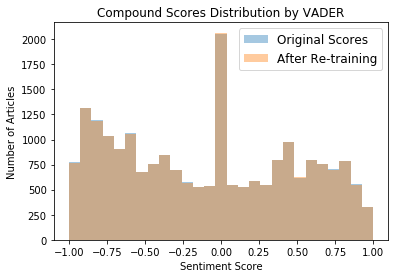

In [106]:

sns.distplot(compound_scores_P,  kde=False, label='Original Scores')

#df =gapminder[gapminder.continent == 'Americas']
sns.distplot(compound_scores,  kde=False,label='After Re-training')


# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Compound Scores Distribution by VADER')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Articles')

In [103]:
compound_scores_P[538]

-0.336

In [96]:
compound_scores[538]

-0.3071

In [77]:
import collections
compare = lambda x, y: collections.Counter(x) == collections.Counter(y)
compare(compound_scores, compound_scores_P)

False

In [98]:
for index, (first, second) in enumerate(zip(compound_scores, compound_scores_P)):
    if first != second:
        print(index, second)

101 0.4215
538 -0.336
3046 -0.988
3712 0.9803
4290 -0.9001
4616 0.5423
4757 -0.9708
4762 -0.2732
4846 -0.1901
5376 0.8897
5585 -0.5994
5737 -0.7184
5880 0.0516
5885 -0.4939
5897 -0.7978
5936 -0.4019
5963 -0.9423
6139 0.1531
6172 -0.9494
6215 -0.9331
6370 0.8411
6399 -0.8689
6402 0.7906
6404 -0.9579
6443 0.8017
8272 -0.9988
8358 -0.9977
10338 -0.8641
10397 0.9508
10445 -0.6808
10505 -0.631
10541 0.9826
10595 -0.3649
10759 -0.9519
10773 -0.9861
10817 -0.1764
10895 -0.9129
10935 0.5994
10940 0.5994
10985 0.9756
10994 0.8522
11007 -0.8006
11087 -0.8326
11587 -0.9489
11620 -0.8856
11720 0.2732
11725 0.2732
11774 -0.5719
11851 0.9161
12052 0.8714
12103 0.5821
12108 0.7409
12564 -0.9888
12588 -0.9709
12589 0.9877
12590 0.9766
12627 0.2148
12733 0.3412
13193 -0.9524
13324 -0.7094
13459 -0.8885
13569 -0.5859
13571 0.911
13585 -0.8885
13692 0.9806
13757 0.128
13782 -0.9538
14096 -0.7351
14161 -0.4588
14312 -0.9821
14371 0.8977
14404 0.9313
14419 0.2484
14464 0.9942
14471 -0.2263
14483 -0.6819
14